## Python3_Jupyter_Notebook

### Importing the libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

### Feeding raw image

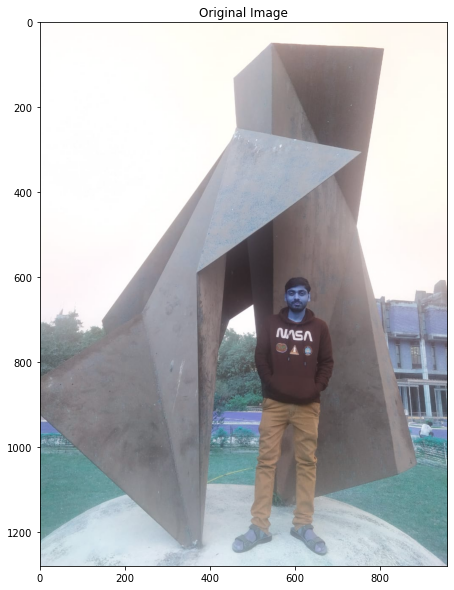

In [2]:
image = cv2.imread('img1.jpeg')
plt.figure(figsize=(10,10))
plt.title('Original Image')
plt.imshow(image)

### Converting raw image to greyscale image

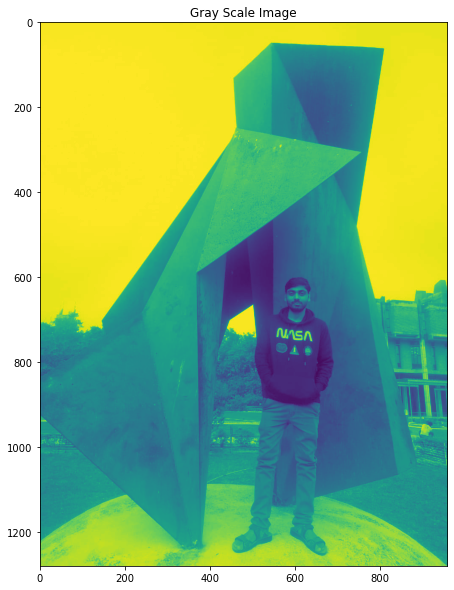

In [3]:
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.title('Gray Scale Image')
plt.imshow(image)

# Why canny?

#### We can not do any stable operation on the image obtained by Sobel, SAR or Laplacean filter since these provides noisy image. We can do any stable operation on image obtained by canny edge detection.

# Five steps of cannyedge detection

### 1. Noise reduction :
#### Since edge detection is susceptible to noise in the image so we remove this using Gaussian filter(using Gaussian matrix)

### 2. Gradient Calculation : 
#### Smoothened image is then filtered with a sobel kernel in both X and Y direction to get derivatives Gx and Gy. From this we can get Gradient Intensity matrix and Gradient Angles. 
#### Edge_Gradient = sqrt(Gx^2+Gy^2) Approximation of gradients 
#### Angle(theta) = tan^-1(Gy/Gx) In which direction intensity changes

### 3. Non-maximum Suppression:
#### The final image should have thin edges. 
#### So we perform non-maximum suppression to thin out the edges
#### The algorithm goes through all the points on the image and finds the pixels with the maximum value of gradient in the edge directions.

### 4.  Double thresholding:
#### For this step we need two threshold values, minVal and maxVal. 
#### Any edges with intensity gradient more than maxVal are sure to be edges and those below minVal are non-edges, so discarded.
#### Those who lie between these two thresholds are classified edges or non-edges based on their connectivity

### 5. Edge tracking by hysteresis: 
#### If they are connected to "sure-edge" pixels, they are considered to be part of edges. Otherwise, they are discarded.

### Taking Gradient of image in X direction

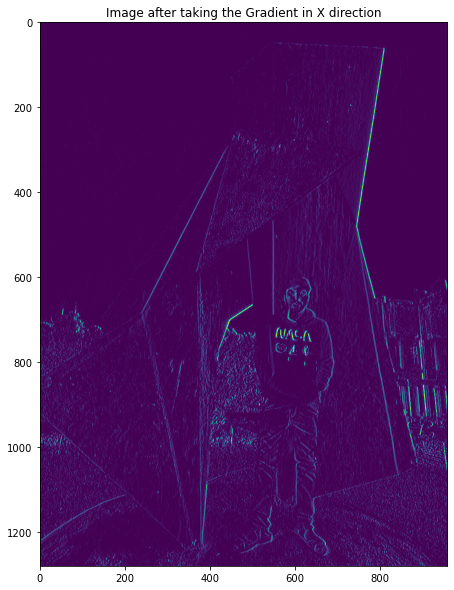

In [4]:
gradients_sobelx = cv2.Sobel(image,-1,1,0)
plt.figure(figsize=(10,10))
plt.title('Image after taking the Gradient in X direction')
plt.imshow(gradients_sobelx)

### Taking Gradient of image in Y direction

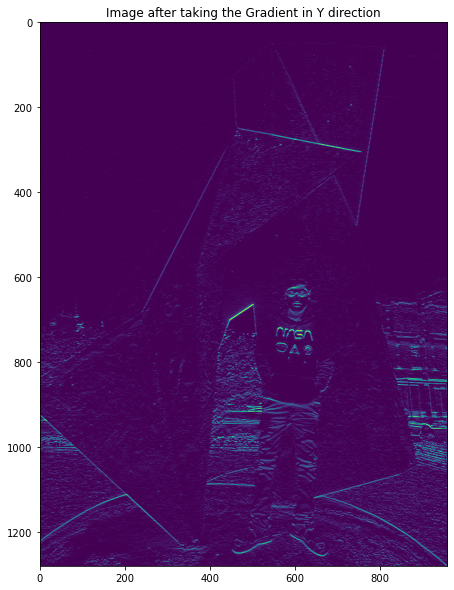

In [5]:
gradients_sobely = cv2.Sobel(image,-1,0,1)
plt.figure(figsize=(10,10))
plt.title('Image after taking the Gradient in Y direction')
plt.imshow(gradients_sobely)

### Adding the gradients of both directions X and Y

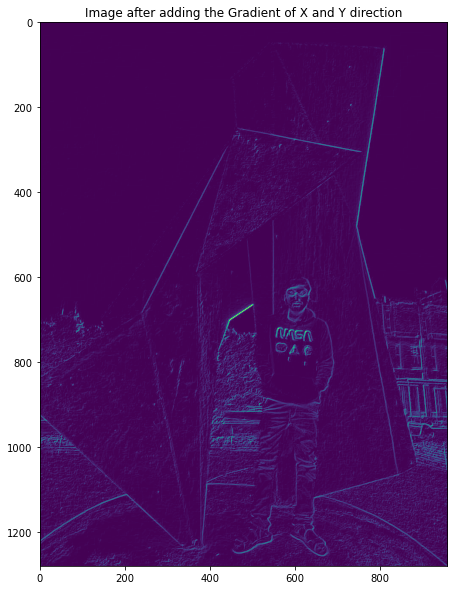

In [6]:
gradients_sobelxy = cv2.addWeighted(gradients_sobelx,0.5,gradients_sobely,0.5,0)
plt.figure(figsize=(10,10))
plt.title('Image after adding the Gradient of X and Y direction')
plt.imshow(gradients_sobelxy)

### Taking the gradients using Laplacean filter

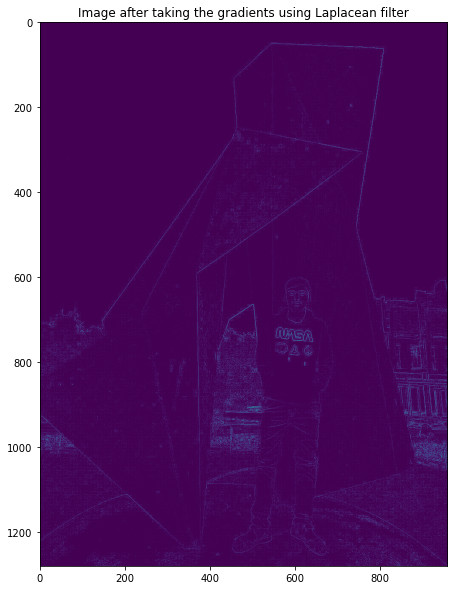

In [7]:
gradients_laplacian = cv2.Laplacian(image,-1)
plt.figure(figsize=(10,10))
plt.title('Image after taking the gradients using Laplacean filter')
plt.imshow(gradients_laplacian)

### Applying the canny edge detection algorithm

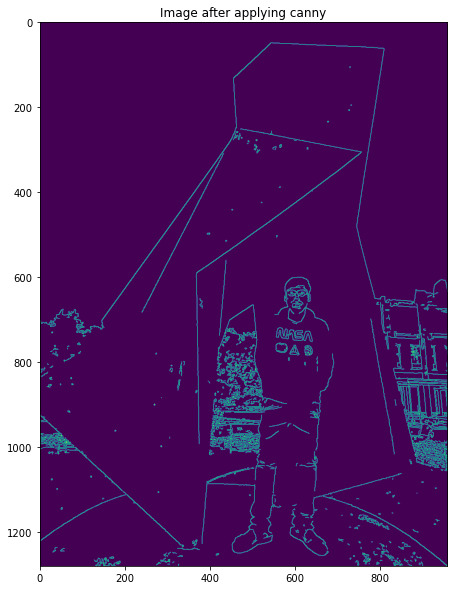

In [8]:
canny_outut = cv2.Canny(image,80,150)
plt.figure(figsize=(10,10))
plt.title('Image after applying canny')
plt.imshow(canny_outut)

### Live Webcam feeding

In [9]:
def LiveCamDetection_canny_edge(color_image):
    im_gray = cv2.cvtColor(color_image,cv2.COLOR_BGR2GRAY)
    canny_edge = cv2.Canny(im_gray,30,100)
    return canny_edge  

### Initializing webcam

In [10]:
# liveVideo = cv2.VideoCapture(0)
# while True:
#     ret, frame = liveVideo.read()
#     cv2.imshow("Live Edge detection",LiveCamDetection_canny_edge(frame))
#     cv2.imshow("Webcam Video",frame)
#     if cv2.waitKey(1) == 13:
#         break
# liveVideo.release()
# cv2.destroyAllWindows()